In [30]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [31]:
data=input_data.read_data_sets("data/MNIST/",one_hot=True) 
#one_hot= Whether to make the labels into a binary array

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [32]:
print("Size of:")
print("Training set \t\t{}".format(len(data.train.labels)))
print("Test set\t\t{}".format(len(data.test.labels)))
print("Validation set\t\t{}".format(len(data.validation.labels)))

Size of:
Training set 		55000
Test set		10000
Validation set		5000


In [33]:
data.test.cls=np.array([label.argmax() for label in data.test.labels])

In [34]:
imgSize=28
imgSizeFlat=imgSize*imgSize
imgShape=(imgSize,imgSize)
noClasses=10
batchSize=100

In [35]:
def plotImages(images,clsTarget,clsPred=None):
    assert len(images)==len(clsTarget)==9
    fig,axes=plt.subplots(3,3)
    fig.subplots_adjust(hspace=0.4,wspace=0.4)
    
    for idx,ax in enumerate(axes.flat):
        ax.imshow(images[idx].reshape(imgShape),cmap='binary')
        if clsPred.all()==None:
            ax.set_xlabel("True: {}".format(clsTarget[idx]))
        else:
            ax.set_xlabel("True: {} Predicted: {}".format(clsTarget[idx],clsPred[idx]))
            
        ax.set_xticks([])
        ax.set_yticks([])
        
        
    


AttributeError: 'NoneType' object has no attribute 'all'

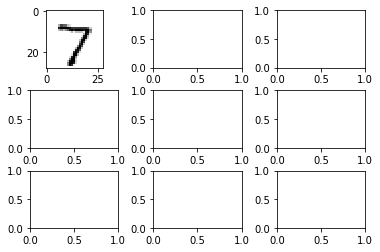

In [36]:
images=data.test.images[0:9]
clsTarget=data.test.labels[0:9]
plotImages(images,clsTarget)

In [37]:
x=tf.placeholder(tf.float32,[None,imgSizeFlat])#(dataType,[dataCount,dataSize])
yTarget=tf.placeholder(tf.float32,[None,noClasses])
yTargetClass=tf.placeholder(tf.int64,[None])
w=tf.Variable(tf.zeros([imgSizeFlat,noClasses]))
b=tf.Variable(tf.zeros([noClasses]))

wxb=tf.matmul(x,w)+b
yPred=tf.nn.softmax(wxb)
yPredClass=tf.argmax(yPred,axis=1)



In [38]:
crossEntropy=tf.nn.softmax_cross_entropy_with_logits(logits=wxb,labels=yTarget)
cost=tf.reduce_mean(crossEntropy)
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)
correctPrediction=tf.equal(yPredClass,yTargetClass)
accuracy=tf.reduce_mean(tf.cast(correctPrediction,tf.float32))

In [39]:
ses=tf.Session()
ses.run(tf.global_variables_initializer())

In [15]:
def optimize(noIterations):
    for i in range(noIterations):
        xBatch,yTargetBatch=data.train.next_batch(batchSize)
        feedDictTrain={x:xBatch,yTarget:yTargetBatch} 
        #Putting the batch into a dictionary with placeholder variable names
        ses.run(optimizer,feed_dict=feedDictTrain)
        

In [25]:
feedDictTest={x : data.test.images,
            yTarget : data.test.labels,
            yTargetClass : data.test.cls}

def printAccuracy():
    acc=ses.run(accuracy,feed_dict=feedDictTest)
    print("Accuracy on test set: {}".format(acc))

def printConfusionMatrix():
    classTarget=data.test.cls
    classPred=ses.run(yPredClass,feed_dict=feedDictTest)
    confMat=confusion_matrix(y_true=classTarget,y_pred=classPred)#sklearn
    print(confMat)
    
    
    plt.imshow(confMat, interpolation='nearest', cmap=plt.cm.Blues)
    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(noClasses)
    plt.xticks(tick_marks, range(noClasses))
    plt.yticks(tick_marks, range(noClasses))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [17]:
def plot9Errors():
    correct, clsPred = ses.run([correctPrediction, yPredClass],
                                    feed_dict=feedDictTest)
    incorrect = (correct == False)
    images = data.test.images[incorrect]
    clsPred = clsPred[incorrect]

    # Get the true classes for those images.
    clsTrue = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plotImages(images=images[0:9],
               clsPred=clsPred[0:9], 
               clsTarget=clsTrue[0:9]
                )
    

In [18]:
def plotWeights():
    # Get the values for the weights from the TensorFlow variable.
    ww = ses.run(w)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(ww)
    w_max = np.max(ww)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = ww[:, i].reshape(imgShape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

Accuracy on test set: 0.9190999865531921


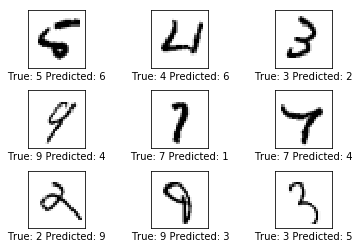

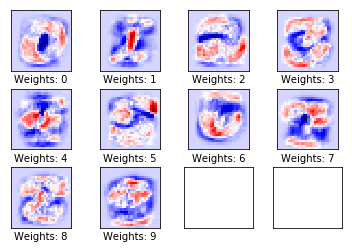

[[ 964    0    1    1    0    2   10    1    1    0]
 [   0 1117    2    2    0    1    4    2    7    0]
 [  10   16  918   14   11    2   13    9   34    5]
 [   5    1   17  924    0   27    2   10   16    8]
 [   1    3    4    1  936    0    9    2    7   19]
 [  12    4    6   36   11  774   16    5   23    5]
 [  13    3    4    2    9   17  908    1    1    0]
 [   3   15   20    7   11    1    0  937    2   32]
 [  11   16    7   31   10   31   13   10  839    6]
 [  12    9    1   13   62    8    0   24    6  874]]


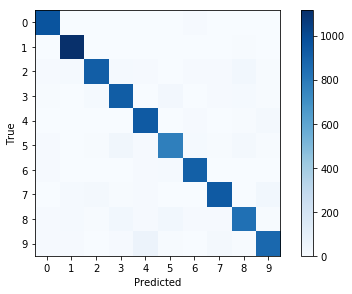

In [29]:
printAccuracy()
plot9Errors()
plotWeights()
printConfusionMatrix()

Accuracy on test set: 0.9190999865531921


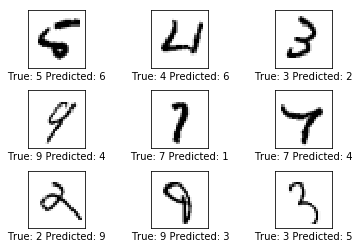

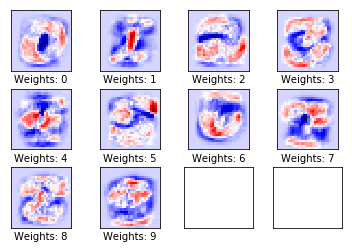

[[ 964    0    1    1    0    2   10    1    1    0]
 [   0 1117    2    2    0    1    4    2    7    0]
 [  10   16  918   14   11    2   13    9   34    5]
 [   5    1   17  924    0   27    2   10   16    8]
 [   1    3    4    1  936    0    9    2    7   19]
 [  12    4    6   36   11  774   16    5   23    5]
 [  13    3    4    2    9   17  908    1    1    0]
 [   3   15   20    7   11    1    0  937    2   32]
 [  11   16    7   31   10   31   13   10  839    6]
 [  12    9    1   13   62    8    0   24    6  874]]


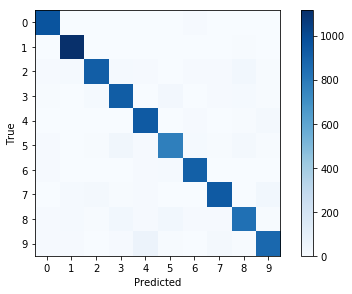

In [28]:
optimize(noIterations=9)
printAccuracy()
plot9Errors()
plotWeights()
printConfusionMatrix()

Accuracy on test set: 0.9204999804496765


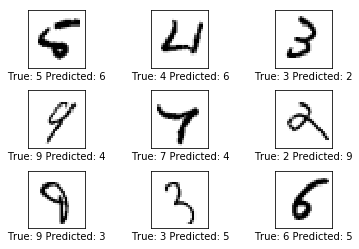

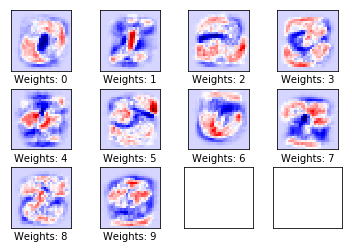

[[ 958    0    1    2    0    4   12    1    2    0]
 [   0 1108    2    2    1    2    4    2   14    0]
 [   7   10  914   15   10    7   14   10   39    6]
 [   4    0   14  912    0   42    2   10   17    9]
 [   1    2    5    2  925    0   10    2    8   27]
 [   9    3    5   26    7  803   11    3   20    5]
 [   9    3    3    2    9   21  906    2    3    0]
 [   1    7   22    8    8    1    0  940    2   39]
 [   7    6    7   26   10   46   11   10  842    9]
 [   9    7    1   11   40   13    1   25    5  897]]


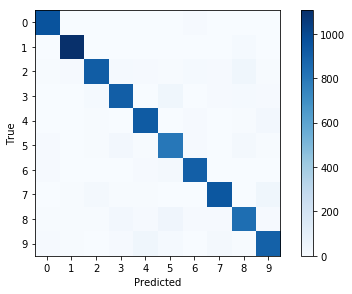

In [27]:
optimize(noIterations=999)
printAccuracy()
plot9Errors()
plotWeights()
printConfusionMatrix()